# Phase 3

### SQL Operations



Note: Create a separate table for each file and give a meaningful name.



When you are inserting make sure you are NOT inserting the column name in the table, else you don’t get a result.



3.1	Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table



3.2	Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year



3.3	Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year



3.4	Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table



3.5	Write SQL query to find the highest number of dacoity/robbery in which district.



3.6	Write SQL query to find in which districts(All) the lowest number of murders happened



3.7	Write SQL query to find the number of murders in ascending order in district and yearwise.



3.8.1	Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table



3.8.2	Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.



3.8.3	Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.



3.8.4	Use appropriate graphs to show your data (the result of 3.8.3)



## SQL Operations

In [2]:
import sqlite3
import csv

## 3.1 Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table

In [3]:
conn = sqlite3.connect('crime_against_women.db')
conn.execute("DROP TABLE IF EXISTS CRIME")
conn.execute('''CREATE TABLE CRIME
             (STATE TEXT , DISTRICT TEXT, Year INTEGER,Rape INTEGER,Kidnapping INTEGER,Dowry INTEGER,Assault  INTEGER,Insult  INTEGER,Cruelty INTEGER, Importation INTEGER)''')

In [4]:
with open('42_District_wise_crimes_committed_against_women_2001_2012.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        # Insert data into the table
        conn.execute("INSERT INTO CRIME (STATE, DISTRICT,Year,Rape,Kidnapping,Dowry,Assault,Insult,Cruelty,Importation) VALUES (?, ?,?,?,?,?,?,?,?,?)",
                     (row['STATE/UT'], row['DISTRICT'],row['Year'],row['Rape'],row['Kidnapping and Abduction'],row['Dowry Deaths'],row['Assault on women with intent to outrage her modesty'],row['Insult to modesty of Women'],row['Cruelty by Husband or his Relatives'],row['Importation of Girls']))

In [5]:
conn.commit

<function Connection.commit>

## 3.2 Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year

<B> RAPES!!
<B> DISTRICT -WISE

In [6]:
cursor=conn.execute("SELECT STATE, DISTRICT,Year,Rape FROM CRIME WHERE DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY Rape DESC LIMIT 1")

<B> RAPES!!
<B> STATE -WISE

In [8]:
cursor=conn.execute("SELECT STATE,Year,SUM(Rape) AS TOTAL_STATEWISE_RAPE FROM CRIME GROUP BY STATE,Year HAVING DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY TOTAL_STATEWISE_RAPE DESC LIMIT 1") 

<B> KIDNAPPINGS!!<BR>
<B> DISTRICT -WISE

In [10]:
cursor=conn.execute("SELECT STATE, DISTRICT,Year,Kidnapping FROM CRIME WHERE DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY Kidnapping DESC LIMIT 1 ")

<B> KIDNAPPINGS!!<BR>
<B> STATE -WISE

In [12]:
cursor=conn.execute("SELECT STATE,Year,SUM(Kidnapping) AS TOTAL_STATEWISE_KIDNAPPING FROM CRIME GROUP BY STATE,Year HAVING DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY TOTAL_STATEWISE_KIDNAPPING DESC LIMIT 1") 

## 3.3 Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year

<B> RAPES!!
<B> DISTRICT -WISE

In [14]:
cursor=conn.execute("SELECT x.* from (SELECT STATE, DISTRICT,Year,Rape,ROW_NUMBER() OVER(PARTITION  BY Rape order by Rape) as rn FROM CRIME WHERE DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY Rape) x where x.rn>=1 and x.Rape=0")

<B> RAPES!!<BR>
<B> STATE -WISE

In [16]:
cursor=conn.execute("SELECT STATE,Year,SUM(Rape) AS TOTAL_RAPES_STATEWISE FROM CRIME GROUP BY STATE,Year HAVING DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') AND TOTAL_RAPES_STATEWISE=0 ORDER BY Rape")

## 3.4	Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

In [18]:
conn1 = sqlite3.connect('crime_against_st.db')
conn1.execute("DROP TABLE IF EXISTS CRIME")
conn1.execute('''CREATE TABLE CRIME
             (STATE TEXT , DISTRICT TEXT, Year INTEGER,Murder INTEGER,Rape INTEGER,Kidnapping INTEGER,Dacoity INTEGER,Robbery  INTEGER,Arson  INTEGER,Hurt INTEGER, Protection  INTEGER,Prevention INTEGER,Other Crimes INTEGER)''')

In [20]:
with open('02_District_wise_crimes_committed_against_ST_2001_2012.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        # Insert data into the table
        conn1.execute("INSERT INTO CRIME (STATE, DISTRICT,Year,Murder,Rape,Kidnapping,Dacoity,Robbery,Arson,Hurt,Protection,Prevention,Other) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?)",
                     (row['STATE/UT'], row['DISTRICT'],row['Year'],row['Murder'],row['Rape'],row['Kidnapping Abduction'],row['Dacoity'],row['Robbery'],row['Arson'],row['Hurt'],row['Protection of Civil Rights (PCR) Act'],row['Prevention of atrocities (POA) Act'],row['Other Crimes Against STs']))

In [21]:
cursor=conn1.execute("SELECT * FROM CRIME")

## 3.5	Write SQL query to find the highest number of dacoity/robbery in which district.

<B> DACOITY!!

In [23]:
cursor=conn1.execute("SELECT DISTRICT,sum(Dacoity) as MOST_DACOITY from CRIME  GROUP BY DISTRICT HAVING DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY MOST_DACOITY DESC LIMIT 1")

<B> ROBBERY!!

In [25]:
cursor=conn1.execute("SELECT DISTRICT,sum(Robbery) as MOST_ROBBERY from CRIME  GROUP BY DISTRICT HAVING DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY MOST_ROBBERY DESC LIMIT 1 ")

## 3.6	Write SQL query to find in which districts(All) the lowest number of murders happened

In [27]:
cursor=conn1.execute(" SELECT p.DISTRICT,p.MOST_MURDERS from (SELECT x.*,RANK() OVER(ORDER BY x.MOST_MURDERS ) as rnn FROM ( SELECT DISTRICT,sum(Murder) as MOST_MURDERS from CRIME  GROUP BY DISTRICT HAVING DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY MOST_MURDERS)x ) p where p.rnn=1")

## 3.7	Write SQL query to find the number of murders in ascending order in district and yearwise.

In [29]:
cursor=conn1.execute("SELECT DISTRICT,Year,SUM(Murder) as TOTAL_MURDER from CRIME GROUP BY DISTRICT,Year")

##  3.8.1	Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table

In [31]:
conn2=sqlite3.connect('TOTAL CRIMES.db')

In [32]:
conn2.execute("DROP TABLE IF EXISTS CRIME")
conn2.execute('''CREATE TABLE CRIME
             (STATE TEXT , DISTRICT TEXT, Year INTEGER,MURDER INTEGER,ATTEMPT_MURDER INTEGER,CULPABLE_MURDER INTEGER,RAPE INTEGER,CUSTODIAL_RAPE INTEGER,OTHER_RAPE INTEGER,KIDNAPPING INTEGER,KIDNAPPING_GIRLS INTEGER,KIDNAPPING_OTHERS INTEGER,DACOITY INTEGER,PREPARATION_DACOITY INTEGER,ROBBERY INTEGER,BURGLARY INTEGER,THEFT INTEGER,AUTO_THEFT INTEGER,OTHER_THEFT INTEGER,RIOTS INTEGER,CRIMINAL_TRUST INTEGER,CHEATING INTEGER,COUNTERFIETING INTEGER,ARSON INTEGER,HURT INTEGER,DOWRY_DEATHS INTEGER,ASSAULT_WOMEN INTEGER,INSULT_WOMEN INTEGER,CRUELTY_HUSBAND INTEGER,IMPORTATION INTEGER,CAUSING_DEATH INTEGER,OTHER_IPC_CRIMES INTEGER,TOTAL_IPC_CRIMES INTEGER)''')


In [36]:
with open('01_District_wise_crimes_committed_IPC_2001_2012.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        # Insert data into the table
        conn2.execute("INSERT INTO CRIME (STATE, DISTRICT,YEAR,MURDER,ATTEMPT_MURDER,CULPABLE_MURDER,RAPE,CUSTODIAL_RAPE,OTHER_RAPE,KIDNAPPING,KIDNAPPING_GIRLS,KIDNAPPING_OTHERS,DACOITY,PREPARATION_DACOITY,ROBBERY,BURGLARY,THEFT,AUTO_THEFT,OTHER_THEFT,RIOTS,CRIMINAL_TRUST,CHEATING,COUNTERFIETING,ARSON,HURT,DOWRY_DEATHS,ASSAULT_WOMEN,INSULT_WOMEN,CRUELTY_HUSBAND,IMPORTATION,CAUSING_DEATH,OTHER_IPC_CRIMES,TOTAL_IPC_CRIMES) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)",
                     (row['STATE/UT'], row['DISTRICT'],row['YEAR'],row['MURDER'],row['ATTEMPT TO MURDER'],row['CULPABLE HOMICIDE NOT AMOUNTING TO MURDER'],row['RAPE'],row['CUSTODIAL RAPE'],row['OTHER RAPE'],row['KIDNAPPING & ABDUCTION'],row['KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS'],row['KIDNAPPING AND ABDUCTION OF OTHERS'],row['DACOITY'],row['PREPARATION AND ASSEMBLY FOR DACOITY'],row['ROBBERY'],row['BURGLARY'],row['THEFT'],row['AUTO THEFT'],row['OTHER THEFT'],row['RIOTS'],row['CRIMINAL BREACH OF TRUST'],row['CHEATING'],row['COUNTERFIETING'],row['ARSON'],row['HURT/GREVIOUS HURT'],row['DOWRY DEATHS'],row['ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY'],row['INSULT TO MODESTY OF WOMEN'],row['CRUELTY BY HUSBAND OR HIS RELATIVES'],row['IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'],row['CAUSING DEATH BY NEGLIGENCE'],row['OTHER IPC CRIMES'],row['TOTAL IPC CRIMES']))
   

In [37]:
cursor=conn2.execute("SELECT * FROM CRIME")

## 3.8.2	Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.

In [39]:
cursor=conn2.execute("SELECT p.STATE,p.DISTRICT,p.MURDER,P.YEAR from( SELECT x.*,rank() over(partition by x.year,x.state order by x.murder desc ) as rnk FROM(SELECT STATE,DISTRICT,MURDER,YEAR FROM CRIME WHERE DISTRICT NOT IN('TOTAL','DELHI UT TOTAL') ORDER BY STATE,YEAR) x) p where p.rnk=1 order by p.STATE" )  

## 3.8.3	Store the above data (the result of 3.8.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order

In [41]:
##cursor=conn2.execute("SELECT p.STATE,p.DISTRICT,p.MURDER,P.YEAR from( SELECT x.*,rank() over(partition by x.year,x.state order by x.murder desc ) as rnk FROM(SELECT STATE,DISTRICT,MURDER,YEAR FROM CRIME WHERE DISTRICT NOT IN('TOTAL','DELHI UT TOTAL') ORDER BY STATE,YEAR) x) p where p.rnk=1" )  

In [42]:
state=[]
district=[]
murder=[]
year=[]

In [43]:
cursor=conn2.execute("SELECT p.STATE,p.DISTRICT,p.MURDER,P.YEAR from( SELECT x.*,rank() over(partition by x.year,x.state order by x.murder desc ) as rnk FROM(SELECT STATE,DISTRICT,MURDER,YEAR FROM CRIME WHERE DISTRICT NOT IN('TOTAL','DELHI UT TOTAL') ORDER BY STATE,YEAR) x) p where p.rnk=1 order by p.STATE" )  

In [47]:
import pandas as pd
for row in cursor:
    state.append(row[0])
    district.append(row[1])
    murder.append(row[2])
    year.append(row[3])

In [48]:
data=pd.DataFrame({'STATE/UT':state,'DISTRICT':district,'TOTAL MURDER':murder,'YEAR':year})

In [49]:
data.head(50)

,STATE/UT,DISTRICT,TOTAL MURDER,YEAR
0,A & N ISLANDS,ANDAMAN,13,2001
1,A & N ISLANDS,ANDAMAN,14,2002
2,A & N ISLANDS,ANDAMAN,16,2003
3,A & N ISLANDS,ANDAMAN,13,2004
4,A & N ISLANDS,ANDAMAN,14,2005
5,A & N ISLANDS,ANDAMAN,3,2006
6,A & N ISLANDS,A and N ISLANDS,15,2007
7,A & N ISLANDS,ANDAMAN,8,2008
8,A & N ISLANDS,ANDAMAN,15,2009
9,A & N ISLANDS,ANDAMAN,8,2010


In [50]:
from collections import Counter

In [51]:
hehe=data['STATE/UT'].unique().tolist()

In [52]:
ind=[]
for i in hehe:
    rep=[]
    for j in (data[data['STATE/UT']==i].index.tolist()):
        rep.append(data[data['STATE/UT']==i]['DISTRICT'][j])
    ff=Counter(rep)
    lil=[]
    for p in ff.keys():
        if(ff[p]>=3):
            lil.append(p)
    for k in lil:
        ind.extend(data[data['DISTRICT']==k].index.to_list())
new_data=data.iloc[ind].copy()    

In [53]:
Counter(new_data['DISTRICT'])

Counter({'ANDAMAN': 10,
         'CYBERABAD': 7,
         'LOHIT': 9,
         'DIBRUGARH': 5,
         'TINSUKIA': 5,
         'PATNA': 12,
         'CHANDIGARH': 12,
         'SARGUJA': 3,
         'BILASPUR': 6,
         'D and N HAVELI': 12,
         'DAMAN': 12,
         'NORTH WEST': 4,
         'OUTER': 5,
         'NORTH GOA': 10,
         'SURAT COMMR.': 9,
         'AHMEDABAD COMMR.': 3,
         'SONIPAT': 6,
         'GURGAON': 5,
         'KANGRA': 11,
         'BARAMULLA': 5,
         'JAMMU': 3,
         'RANCHI': 10,
         'BANGALORE COMMR.': 12,
         'PALAKKAD': 5,
         'THRISSUR': 3,
         'LAKSHADWEEP': 12,
         'JHABUA': 6,
         'INDORE': 6,
         'MUMBAI': 5,
         'MUMBAI COMMR.': 7,
         'IMPHAL(WEST)': 4,
         'THOUBAL': 3,
         'IMPHAL WEST': 3,
         'KHASI HILLS EAST': 3,
         'JAINTIA HILLS': 9,
         'AIZAWL': 11,
         'DIMAPUR': 10,
         'MAYURBHANJ': 6,
         'SUNDARGARH': 3,
         'KEONJHAR'

IT CAN BE SEEN THAT ONLY THOSE DISTRICTS ARE THERE IN WHICH THE COUNT IN EQUAL OR MORE THAN 3!!

In [54]:
new_data.sort_values(by='TOTAL MURDER',ascending=False,inplace=True)

In [55]:
new_data.head(50)

,STATE/UT,DISTRICT,TOTAL MURDER,YEAR
53,BIHAR,PATNA,542,2004
52,BIHAR,PATNA,484,2003
51,BIHAR,PATNA,472,2002
54,BIHAR,PATNA,436,2005
50,BIHAR,PATNA,434,2001
61,BIHAR,PATNA,356,2012
57,BIHAR,PATNA,341,2008
55,BIHAR,PATNA,338,2006
403,UTTAR PRADESH,MUZAFFARNAGAR,324,2001
56,BIHAR,PATNA,317,2007


## 3.8.4	Use appropriate graphs to show your data (the result of 3.8.3)

In [56]:
dwmr=new_data.groupby(by='DISTRICT').sum().reset_index().sort_values(by='TOTAL MURDER',ascending=False)

In [57]:
dwmr

,DISTRICT,TOTAL MURDER,YEAR
42,PATNA,4586,24078
6,BANGALORE COMMR.,2831,24078
45,RANCHI,2322,20055
36,MUMBAI COMMR.,1542,14063
0,24 PARGANAS NORTH,1521,16037
37,MUZAFFARNAGAR,1475,12028
13,CYBERABAD,1360,14063
35,MUMBAI,1254,10015
11,CHENNAI,1137,18069
53,WEST,995,28089


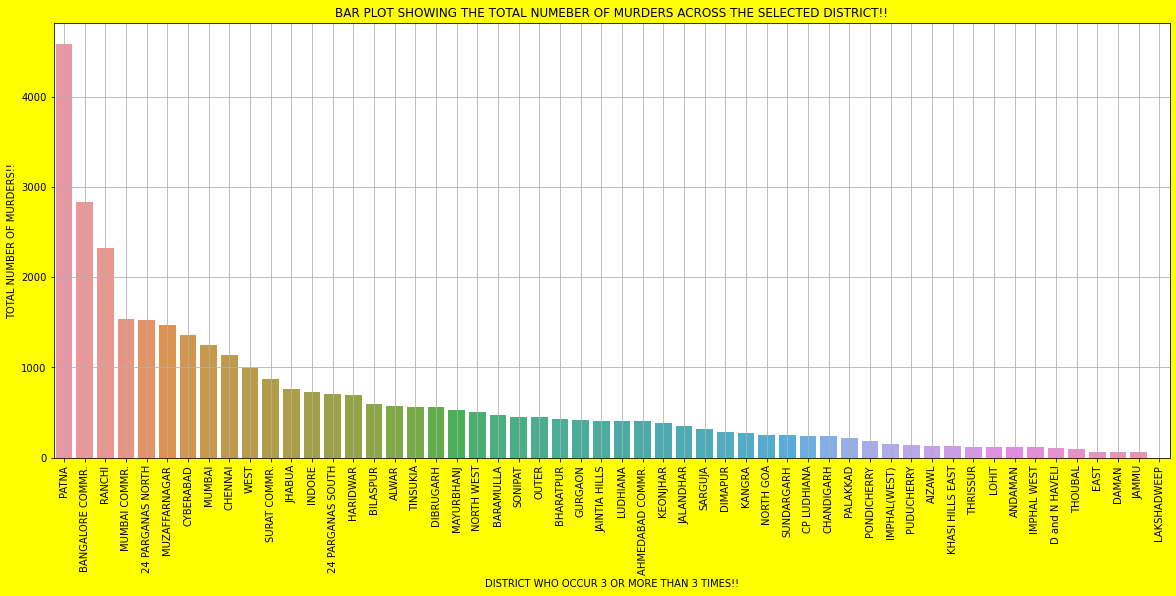

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.figure(figsize=(20,8),facecolor='Yellow')
sns.barplot(x=dwmr['DISTRICT'],y=dwmr['TOTAL MURDER'])
plt.xticks(rotation=90)
plt.xlabel("DISTRICT WHO OCCUR 3 OR MORE THAN 3 TIMES!!")
plt.ylabel("TOTAL NUMBER OF MURDERS!!")
plt.grid()
plt.title("BAR PLOT SHOWING THE TOTAL NUMEBER OF MURDERS ACROSS THE SELECTED DISTRICT!!")
plt.show()

PATNA HAVE THE HIGHEST NUMBER OF MURDERS RECORDED ACROSS ALL THE SELECTED DISTRICTS!!<BR>
LAKSHDWEEP REPORTS THE LOWEST NUMBERS AMONG ALL!!<BR>


In [61]:
xx=new_data.groupby(by='YEAR').sum().reset_index().sort_values(by='TOTAL MURDER',ascending=False)

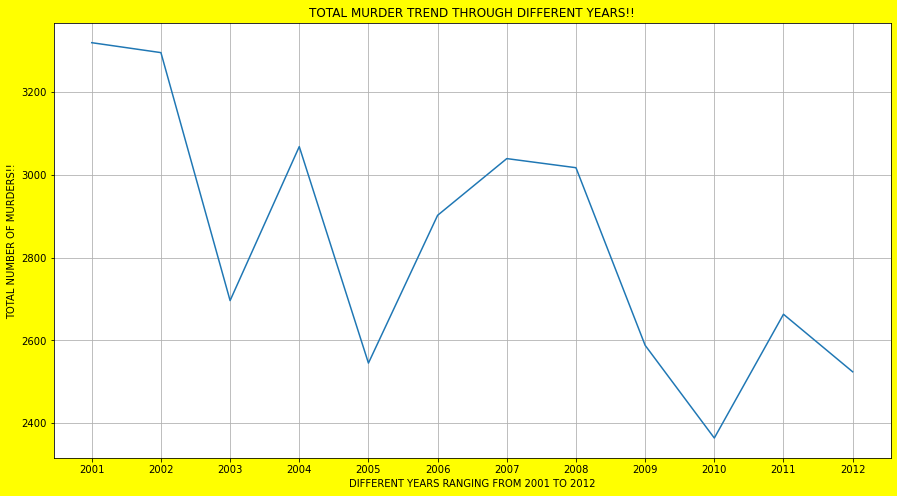

In [62]:
plt.figure(figsize=(15,8),facecolor='Yellow')
sns.lineplot(x=xx['YEAR'],y=xx['TOTAL MURDER'])
plt.xlabel("DIFFERENT YEARS RANGING FROM 2001 TO 2012")
plt.xticks([x for x in range(2001,2013)])
plt.ylabel("TOTAL NUMBER OF MURDERS!!")
plt.grid()
plt.title("TOTAL MURDER TREND THROUGH DIFFERENT YEARS!!")
plt.show()

ITS QUEIT VISIBLE FROM THE ABOVE GRAPH THAT THERE IS OVERALL DESCREASE IN THE TOTAL NUMBER OF MURDERS FROM THE YEAR 2001 TO 2012 IN TOTAL!!<BR>
YEAR 2010 RECORDS THE LOWEST NUMBER OF MURDERS AMONG ALL THE YEARS!!<BR> 

In [63]:
xx.sort_values(by='YEAR',inplace=True)

In [64]:
def chc(df,x):
    mod=[]
    lk=df[x].tolist()
    for i in range(len(lk)):
        if (i==0):
            mod.append(0)
        else:
            mod.append(round((lk[i]-lk[i-1])/lk[i]*100,2))
    return mod
nn=chc(xx,'TOTAL MURDER')
xx['TOTAL CHANGE COMPARED TO THE PREVIUOS YEAR']=nn
    

In [65]:
xx

,YEAR,TOTAL MURDER,TOTAL CHANGE COMPARED TO THE PREVIUOS YEAR
0,2001,3319,0.00
1,2002,3295,-0.73
2,2003,2696,-22.22
3,2004,3068,12.13
4,2005,2545,-20.55
5,2006,2902,12.30
6,2007,3039,4.51
7,2008,3017,-0.73
8,2009,2588,-16.58
9,2010,2364,-9.48


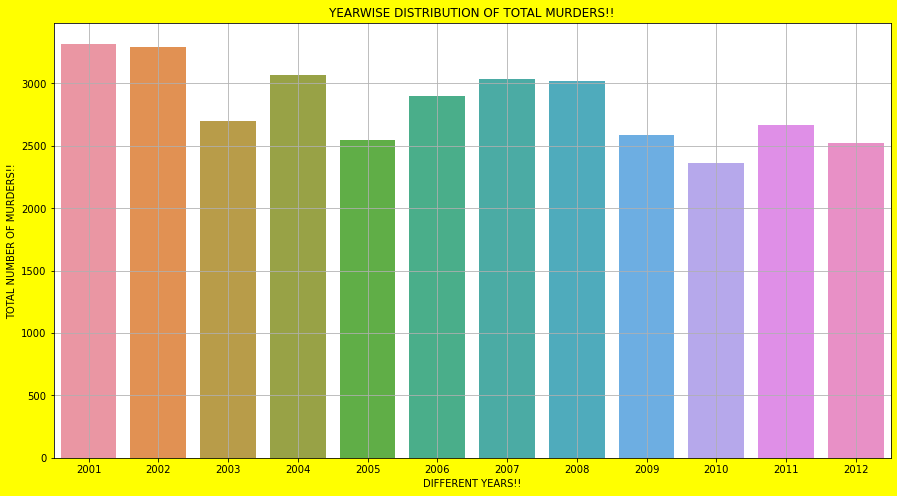

In [66]:
plt.figure(figsize=(15,8),facecolor='Yellow')
sns.barplot(x=xx['YEAR'],y=xx['TOTAL MURDER'])
plt.xlabel("DIFFERENT YEARS!!")
plt.ylabel("TOTAL NUMBER OF MURDERS!!")
plt.title("YEARWISE DISTRIBUTION OF TOTAL MURDERS!!")
plt.grid()
plt.show()

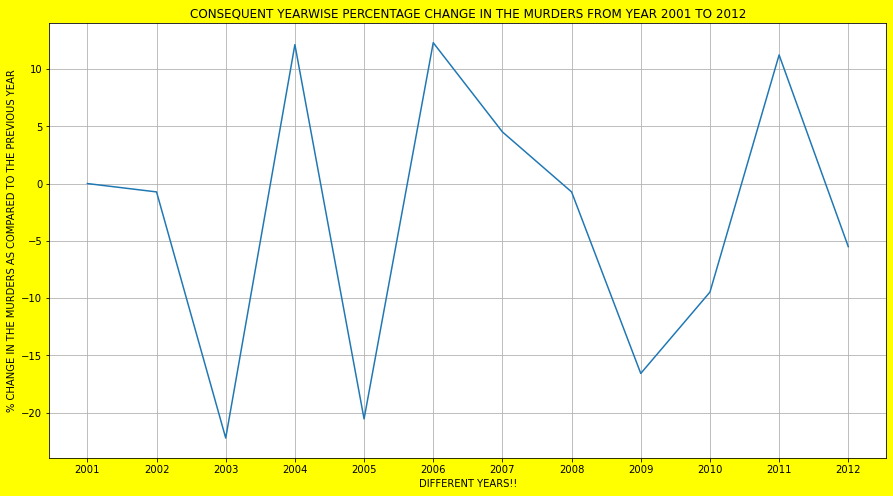

In [67]:
plt.figure(figsize=(15,8),facecolor='Yellow')
sns.lineplot(x=xx['YEAR'],y=xx['TOTAL CHANGE COMPARED TO THE PREVIUOS YEAR'])
plt.xlabel("DIFFERENT YEARS!!")
plt.xticks([x for x in range(2001,2013)])
plt.ylabel("% CHANGE IN THE MURDERS AS COMPARED TO THE PREVIOUS YEAR")
plt.title("CONSEQUENT YEARWISE PERCENTAGE CHANGE IN THE MURDERS FROM YEAR 2001 TO 2012")
plt.grid()
plt.show()

In [68]:
pivo=pd.pivot_table(data=new_data,values='TOTAL MURDER',index='YEAR',columns='DISTRICT')

In [69]:
pivo=pivo.fillna(0)

In [70]:
pivo

DISTRICT,24 PARGANAS NORTH,24 PARGANAS SOUTH,AHMEDABAD COMMR.,AIZAWL,ALWAR,ANDAMAN,BANGALORE COMMR.,BARAMULLA,BHARATPUR,BILASPUR,...,PUDUCHERRY,RANCHI,SARGUJA,SONIPAT,SUNDARGARH,SURAT COMMR.,THOUBAL,THRISSUR,TINSUKIA,WEST
YEAR,,,,,,,,,,,,,,,,,,,,,
2001,202.0,0.0,0.0,12.0,0.0,13.0,221.0,144.0,0.0,0.0,...,0.0,243.0,105.0,73.0,0.0,98.0,0.0,0.0,0.0,125.0
2002,204.0,0.0,222.0,0.0,0.0,14.0,201.0,121.0,87.0,0.0,...,0.0,270.0,101.0,82.0,87.0,0.0,0.0,0.0,115.0,113.0
2003,193.0,0.0,90.0,14.0,0.0,16.0,216.0,0.0,0.0,95.0,...,0.0,250.0,0.0,62.0,83.0,0.0,0.0,0.0,0.0,136.0
2004,177.0,0.0,92.0,10.0,0.0,13.0,214.0,86.0,92.0,0.0,...,0.0,270.0,111.0,67.0,0.0,0.0,38.0,0.0,0.0,51.0
2005,168.0,0.0,0.0,4.0,0.0,14.0,242.0,78.0,91.0,94.0,...,0.0,239.0,0.0,0.0,82.0,86.0,0.0,41.0,0.0,61.0
2006,154.0,0.0,0.0,7.0,75.0,3.0,218.0,0.0,75.0,0.0,...,0.0,253.0,0.0,0.0,0.0,103.0,0.0,44.0,0.0,74.0
2007,194.0,0.0,0.0,18.0,89.0,0.0,246.0,47.0,0.0,0.0,...,0.0,203.0,0.0,0.0,0.0,108.0,0.0,0.0,143.0,35.5
2008,0.0,239.0,0.0,12.0,101.0,8.0,253.0,0.0,0.0,112.0,...,30.0,209.0,0.0,84.0,0.0,97.0,46.0,38.0,114.0,72.0
2009,229.0,0.0,0.0,14.0,103.0,15.0,256.0,0.0,0.0,0.0,...,31.0,202.0,0.0,0.0,0.0,101.0,0.0,0.0,0.0,61.0


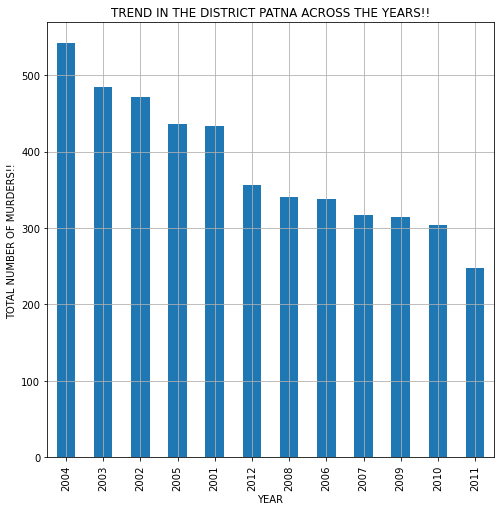

In [71]:
pivo['PATNA'].sort_values(ascending=False).plot(kind='bar',figsize=(8,8))
plt.ylabel("TOTAL NUMBER OF MURDERS!!")
plt.title("TREND IN THE DISTRICT PATNA ACROSS THE YEARS!!")
plt.grid()
plt.show()

## DISTRICT-WISE ANALYSIS OF THE TOTAL MURDERS!!

In [72]:
pat=pivo.columns.tolist()

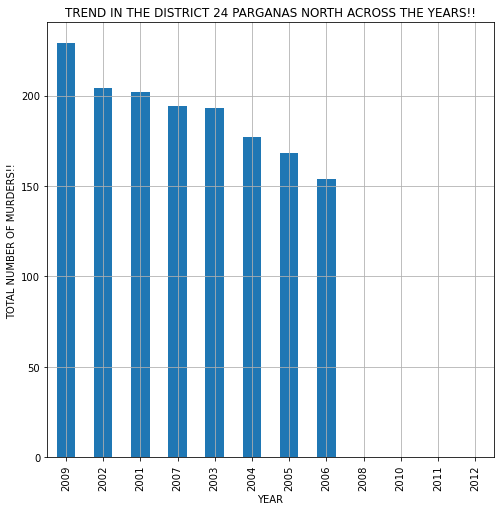

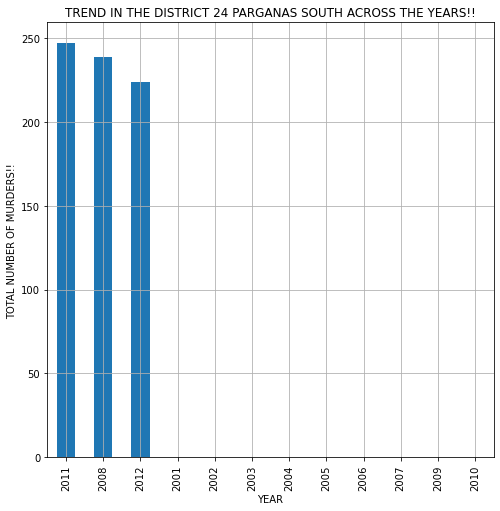

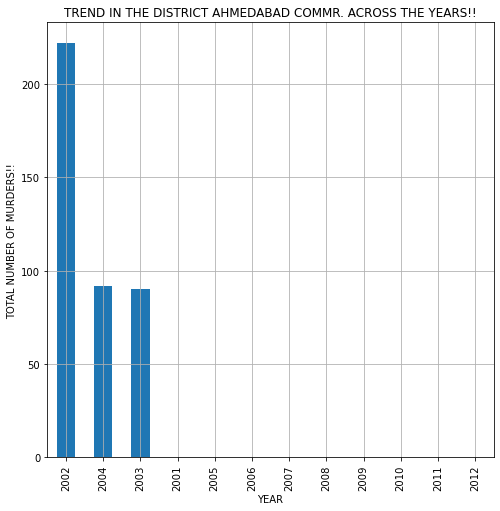

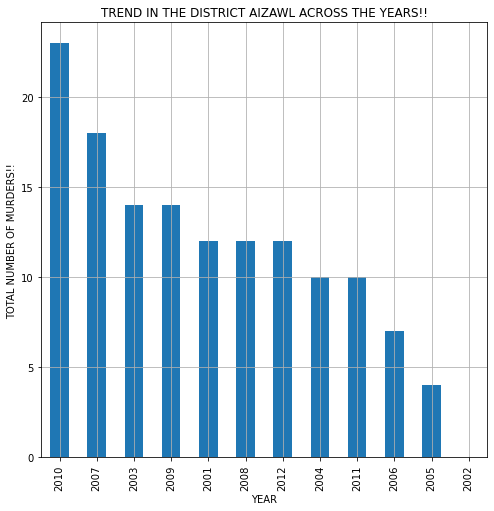

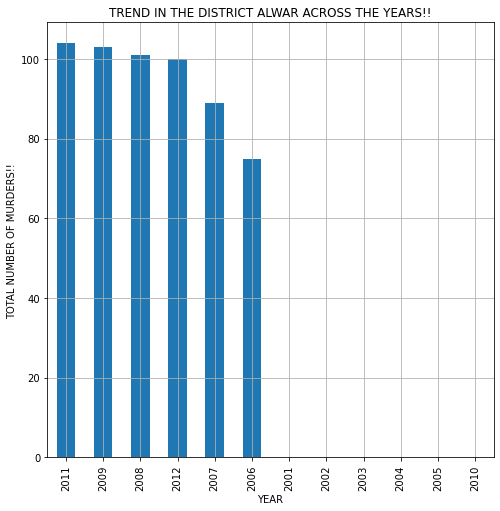

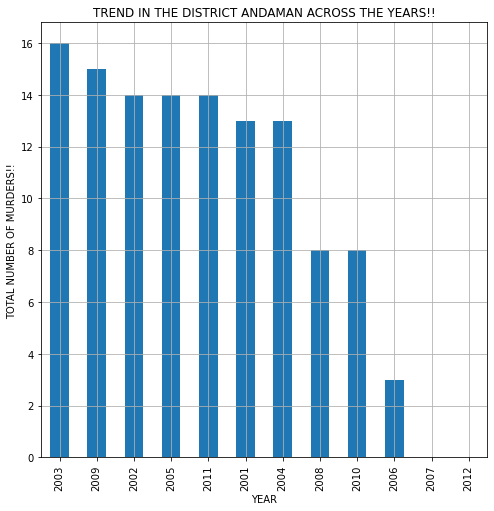

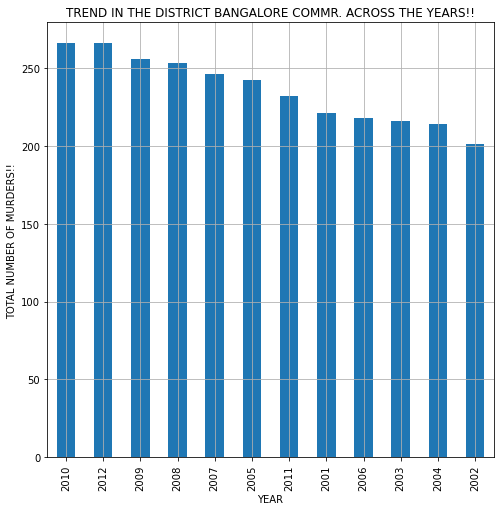

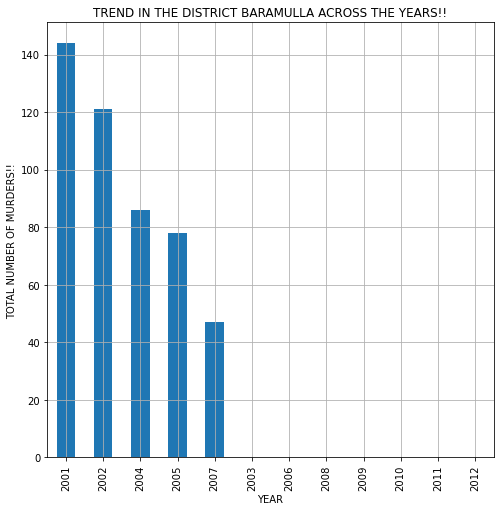

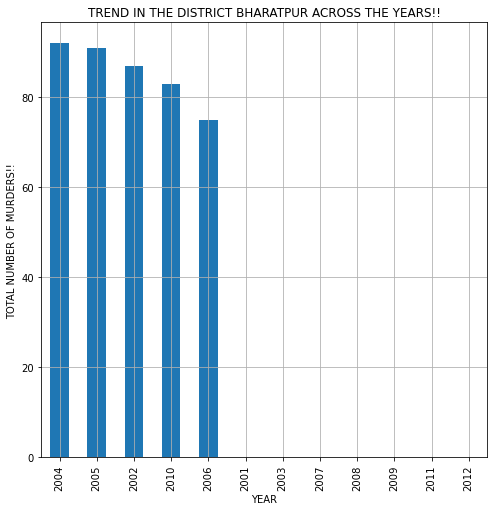

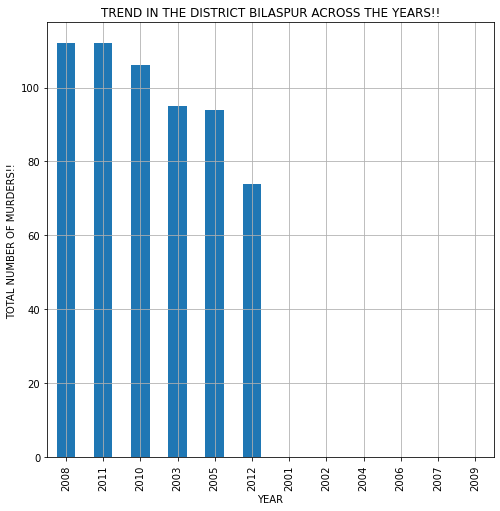

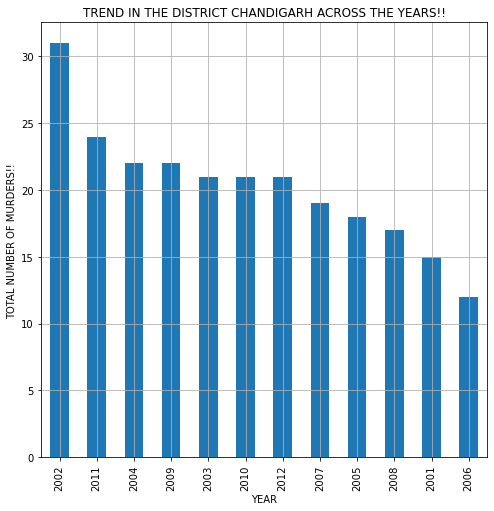

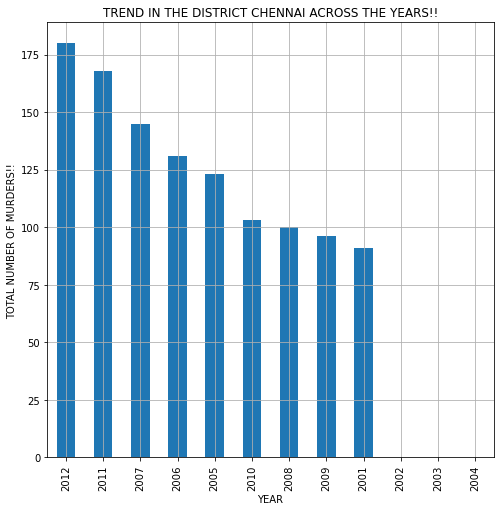

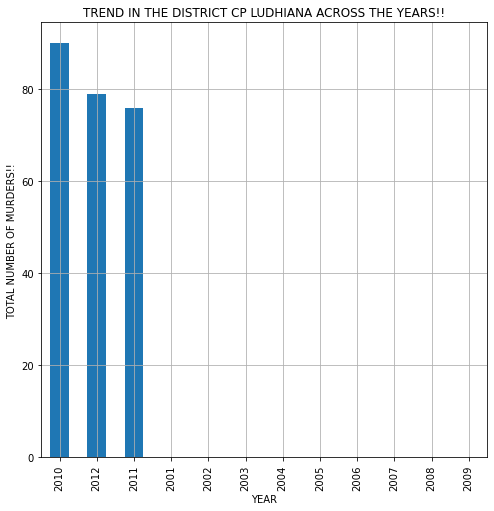

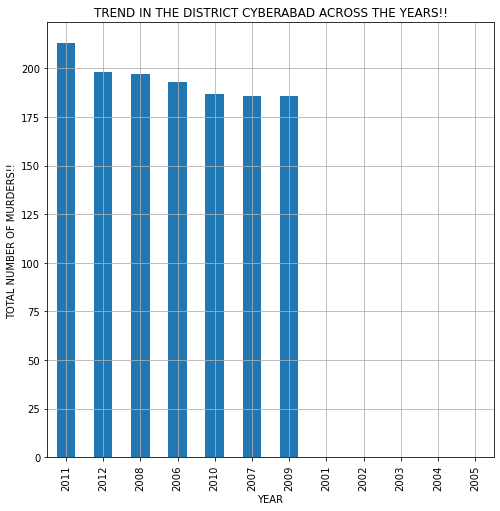

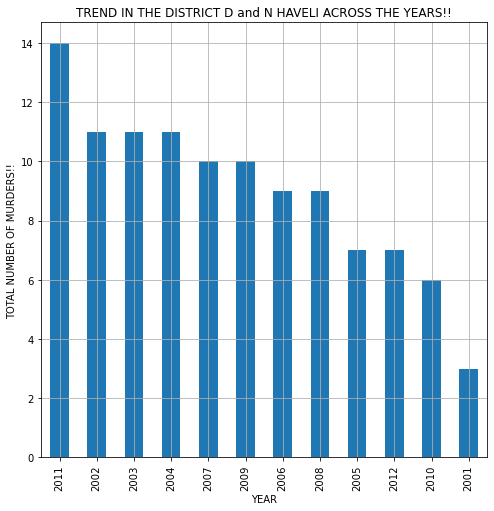

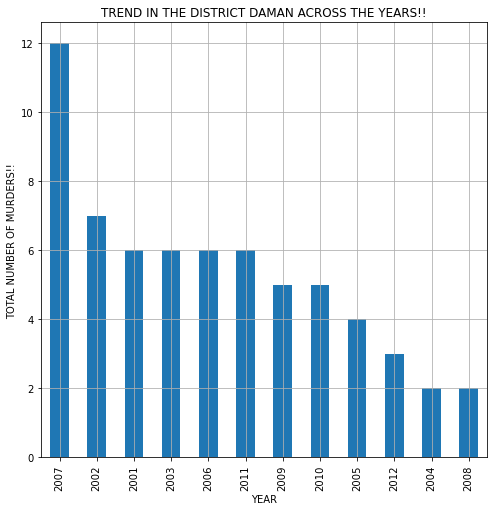

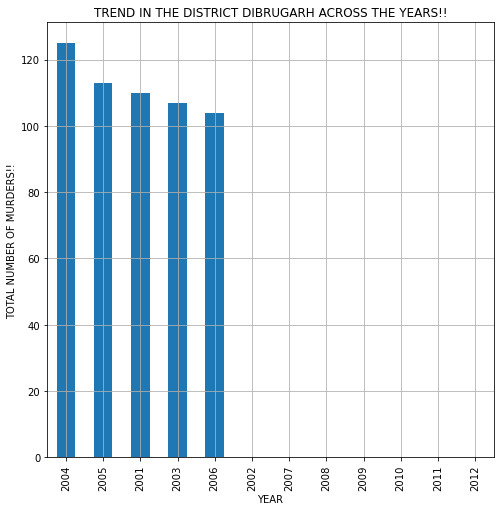

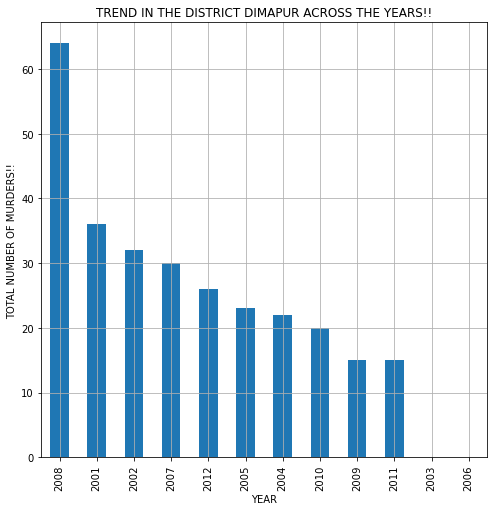

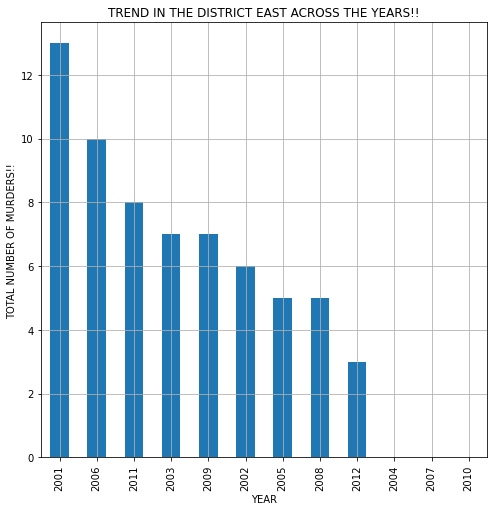

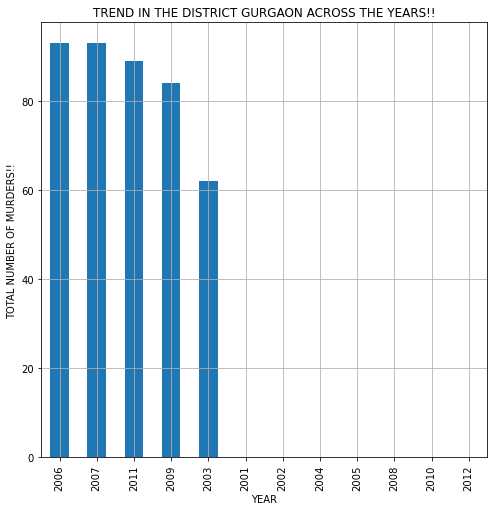

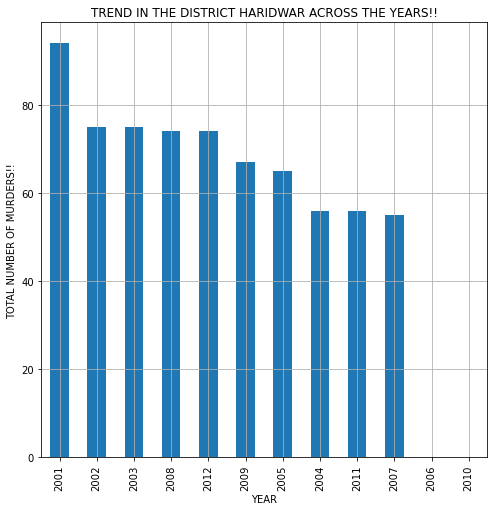

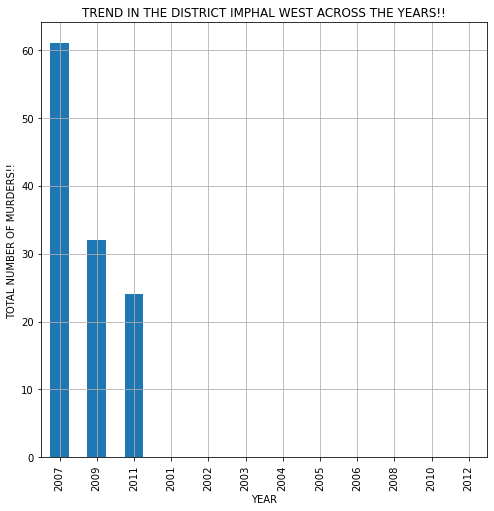

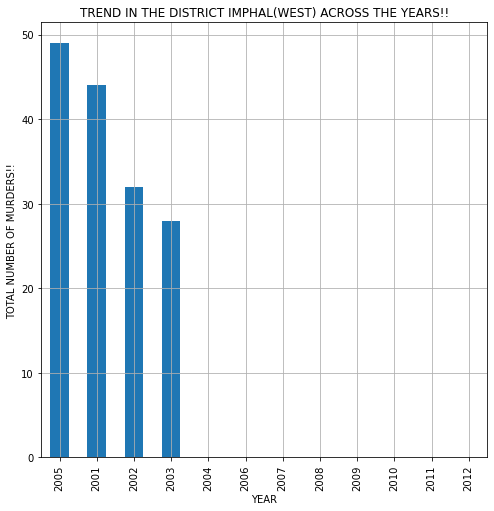

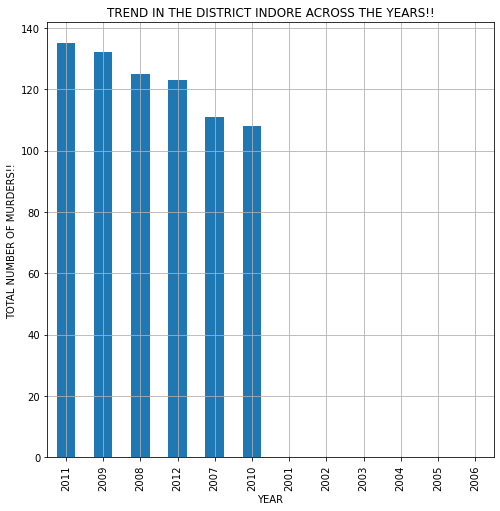

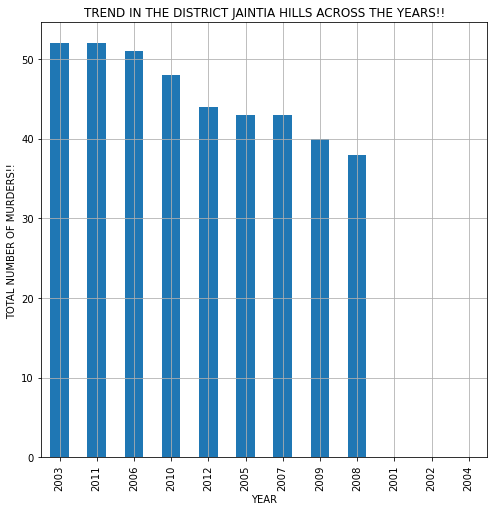

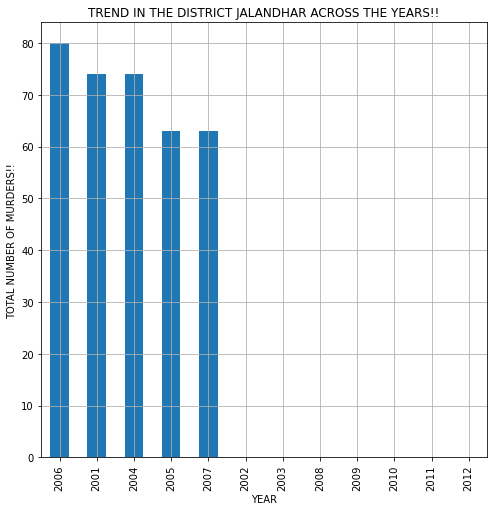

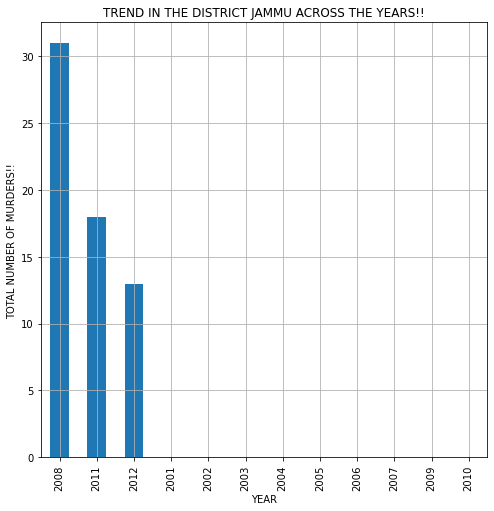

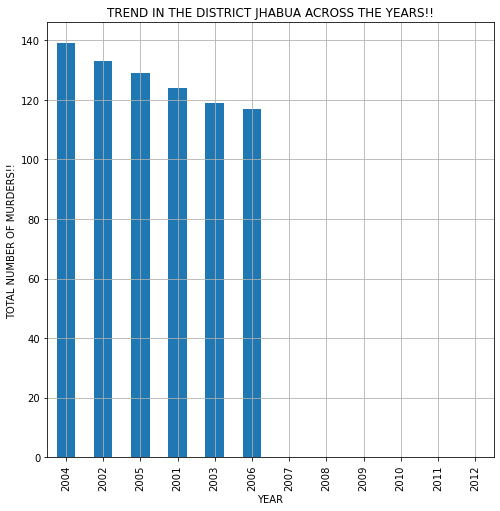

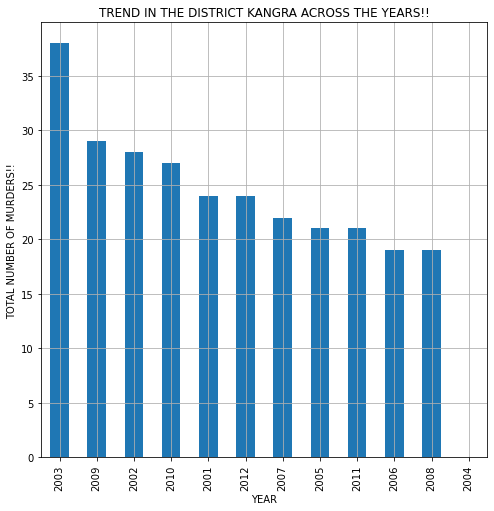

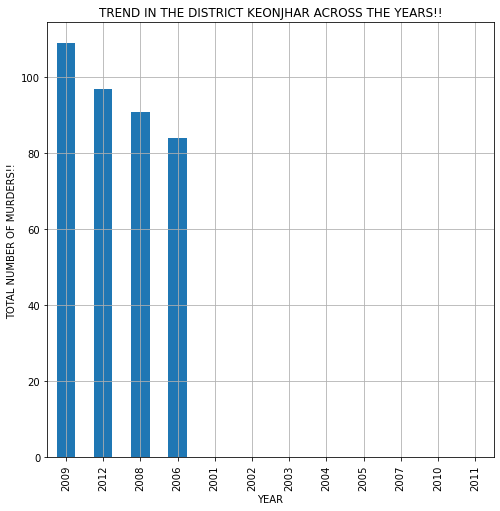

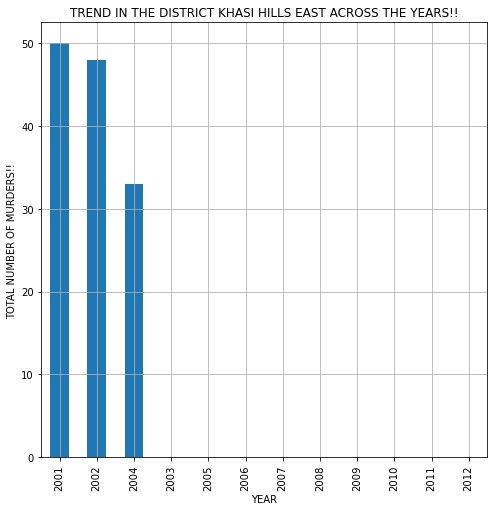

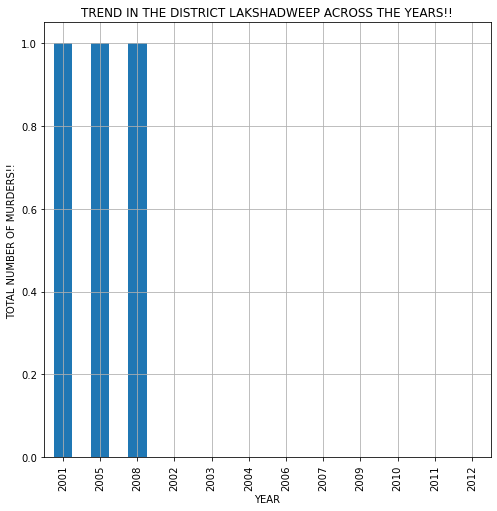

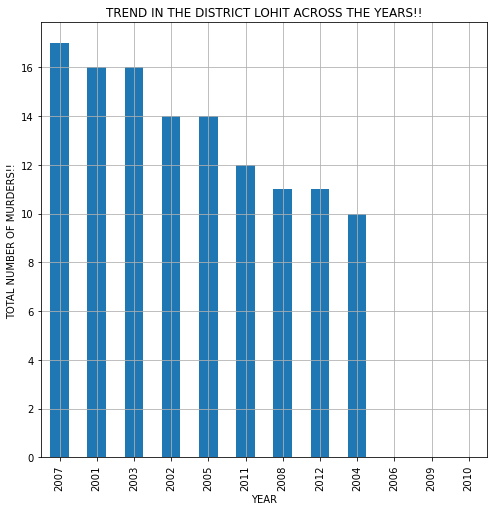

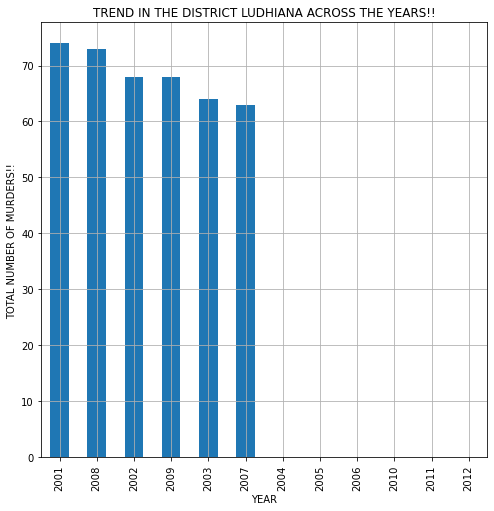

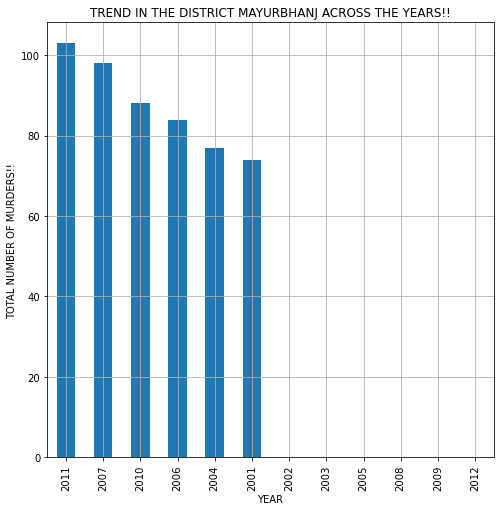

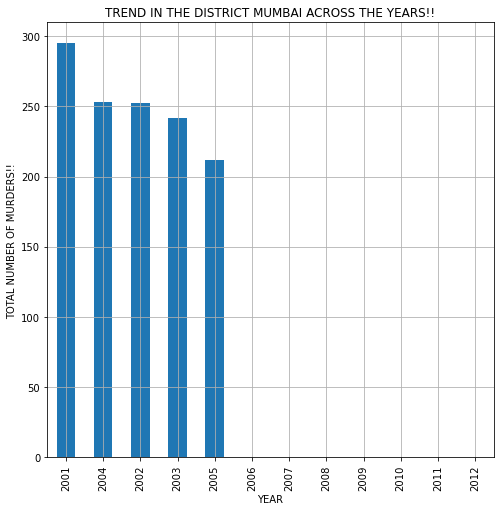

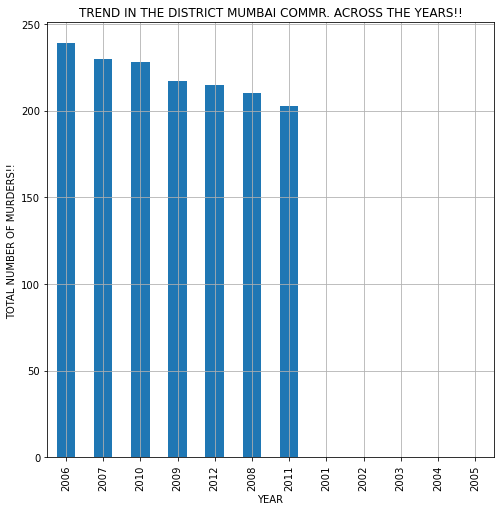

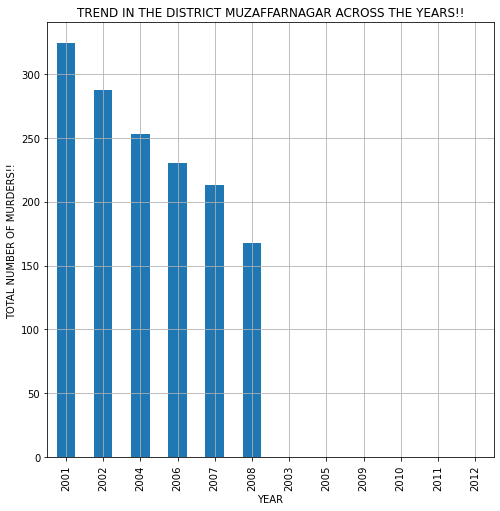

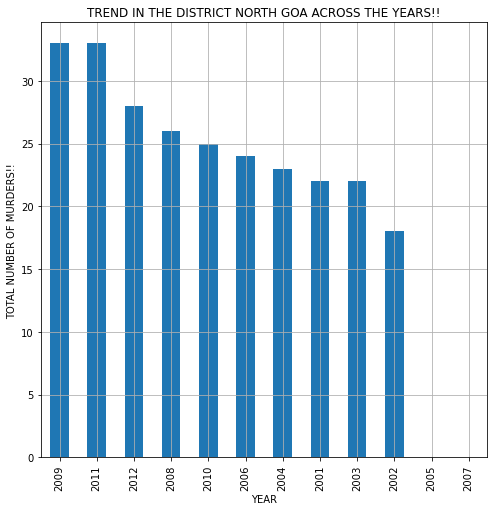

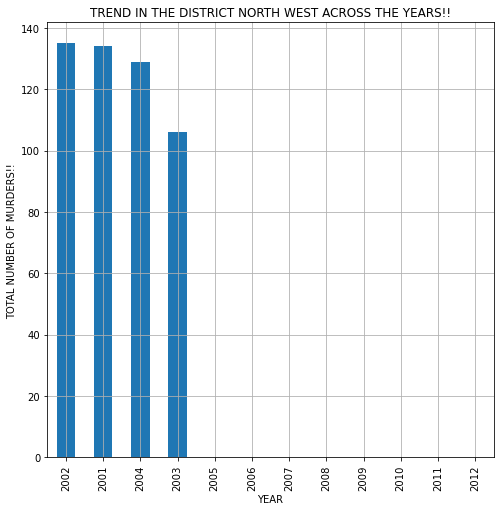

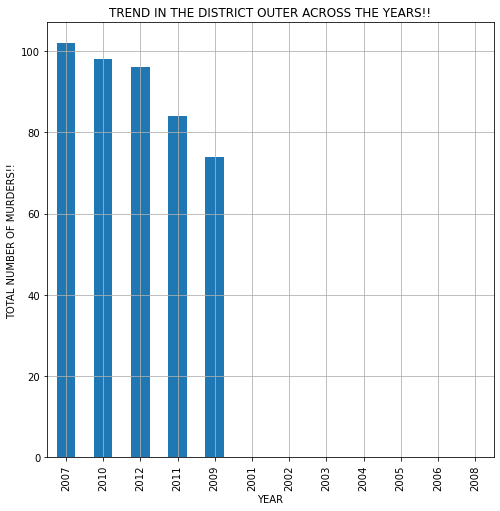

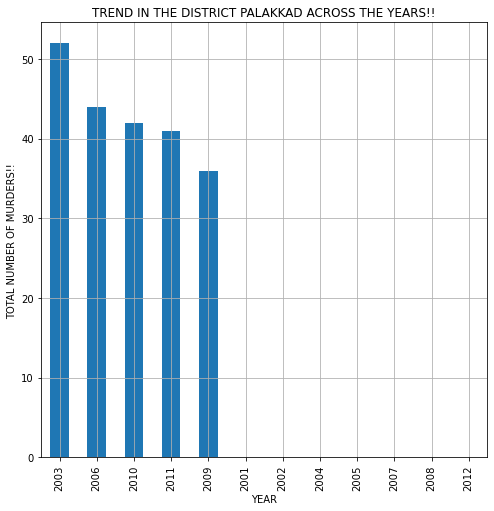

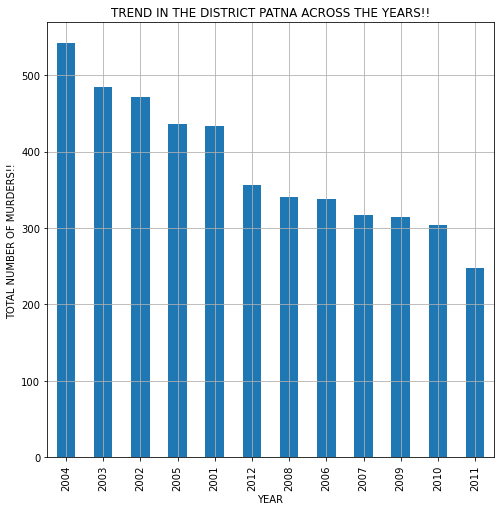

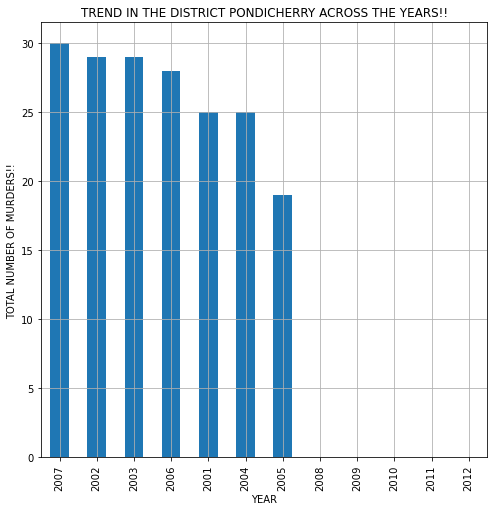

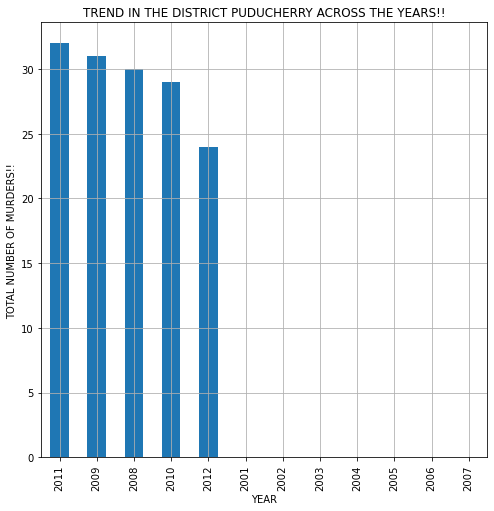

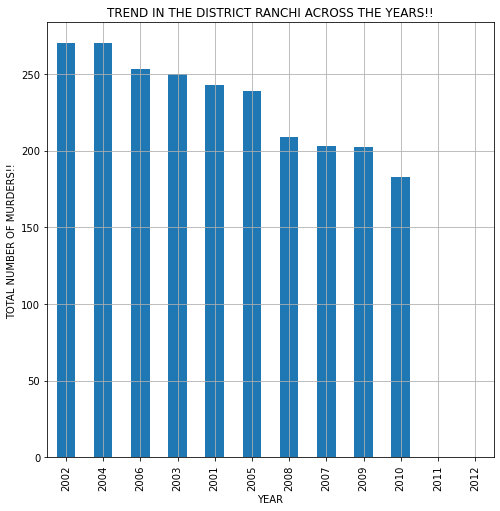

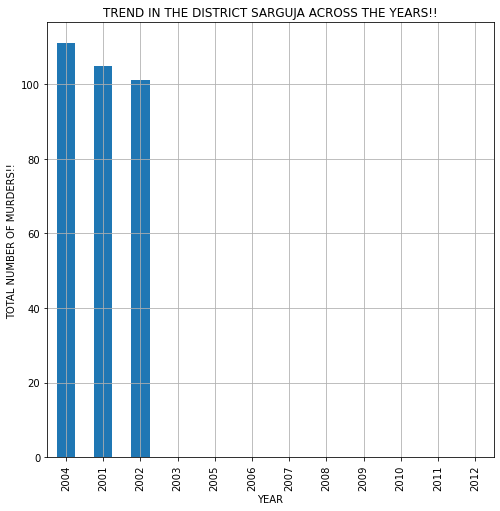

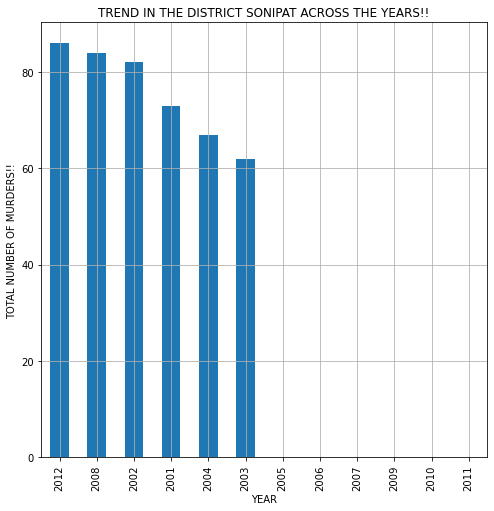

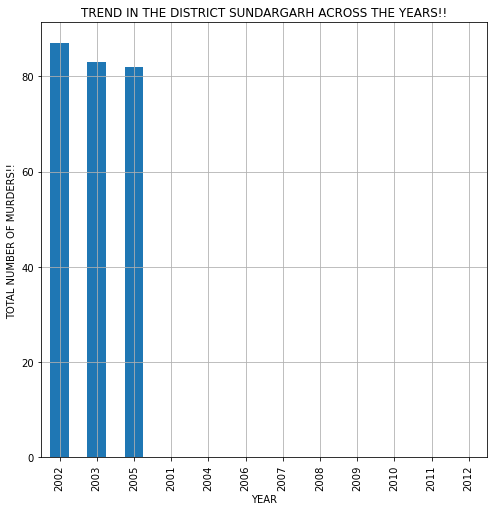

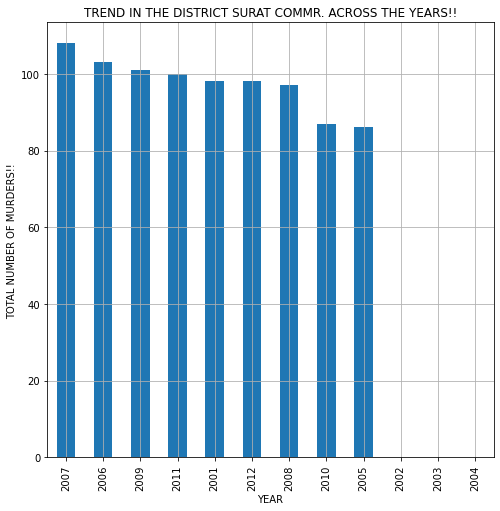

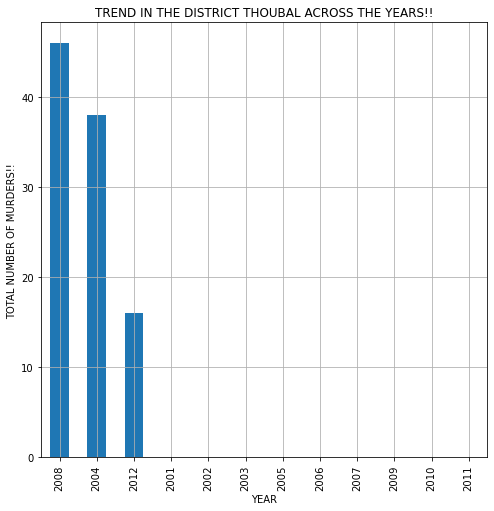

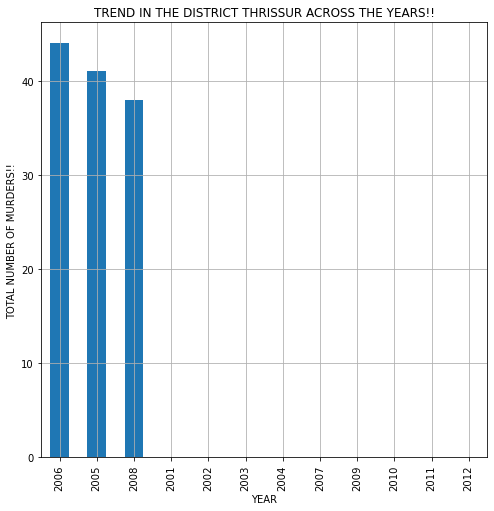

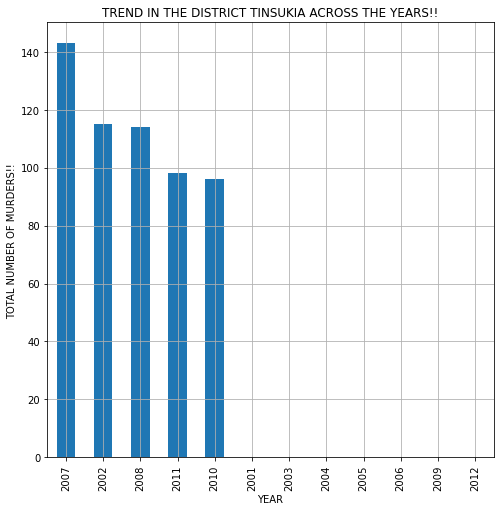

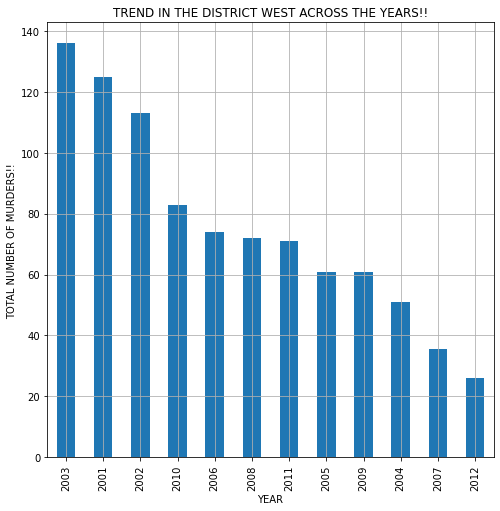

In [73]:
for i in pat:
    pivo[i].sort_values(ascending=False).plot(kind='bar',figsize=(8,8))
    plt.ylabel("TOTAL NUMBER OF MURDERS!!")
    plt.title("TREND IN THE DISTRICT {} ACROSS THE YEARS!!".format(i))
    plt.grid()
    plt.show()